# spread polynomial study

thanks to Federico Rocca for sharing this:
- https://www.dropbox.com/s/g2bdsg397us3m41/Spreads%20-%20Jupyter%20Notebook.pdf?dl=0

and to Dr. Wildberger.

Here are some of the changes and additions from Federico's:

- Set `Spread` function to ensure we get a Sympy polynomial, which allows for easy extraction of the coefficients. 
- cast the ints as sympy Integers. This removes the floating point values from the expressions
- created a list of coefficients in `results`. Reversed each set so they are ordered low to high (allows for easy stacking)

[0, 1]
-----------------------


[0, 4, -4]
-----------------------


[0, 9, -24, 16]
-----------------------


[0, 16, -80, 128, -64]
-----------------------


[0, 25, -200, 560, -640, 256]
-----------------------


[0, 36, -420, 1792, -3456, 3072, -1024]
-----------------------


[0, 49, -784, 4704, -13440, 19712, -14336, 4096]
-----------------------


[0, 64, -1344, 10752, -42240, 90112, -106496, 65536, -16384]
-----------------------


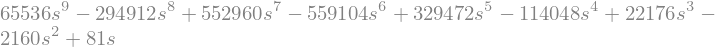

[0, 81, -2160, 22176, -114048, 329472, -559104, 552960, -294912, 65536]
-----------------------


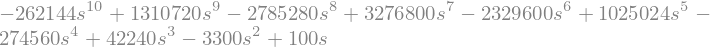

[0, 100, -3300, 42240, -274560, 1025024, -2329600, 3276800, -2785280, 1310720, -262144]
-----------------------


In [1]:
from sympy import symbols, Function, Indexed, Rational, Expr, Poly, Integer
from sympy import Sum, factorial, binomial, oo, IndexedBase, chebyshevt, chebyshevu
# import sympy.functions as sym
from sympy import init_printing
init_printing(use_latex=True)
from sympy import pprint
from sympy import Symbol
from IPython.display import display
import math
x = Symbol('x')

def Spread(n):
    s = Symbol('s')
    n = Integer(n)
    p = Integer(0)
    for k in range(1, n+1):
        k = Integer(k)
        p += Poly(((-4)**(k-1))/(n+k) * binomial(n+k,2*k) * s**k)
    return 2*n*p

def Chebyshev(n):
    n = Integer(n)
    
    p = Poly((-((-1)**n+1)/2)**((n+4)/2))
    for i in range(1, n+1):
        i = Integer(i)
        p += Poly(n*(((-1)**(n+i)+1)/2 * (-1)**((n-i)/2)) * 2**(i-1) * \
                factorial((n-2+i)//2)/(factorial((n-i)//2) * factorial(i)) * x**i)
    return p

results = []
polys = []

count = 10

for n in range(1, count + 1):
    p = Spread(n)
    # p = chebyshevt(n, x)
    # p = chebyshevu(n, x)
    p = p.as_poly()
    
    display((Indexed('T', n), p))
    if hasattr(p, 'expr'):
        polys.append(p)
        display(p.expr)
    if hasattr(p, 'coeffs'):
        cfs = p.all_coeffs()
        cfs.reverse()
        print(cfs)
        results.append(cfs)
    print('-----------------------')
        


The alternating domains on the Poly's are an iteresting result

In [2]:
for cfs in results:
    print(cfs)

[0, 1]
[0, 4, -4]
[0, 9, -24, 16]
[0, 16, -80, 128, -64]
[0, 25, -200, 560, -640, 256]
[0, 36, -420, 1792, -3456, 3072, -1024]
[0, 49, -784, 4704, -13440, 19712, -14336, 4096]
[0, 64, -1344, 10752, -42240, 90112, -106496, 65536, -16384]
[0, 81, -2160, 22176, -114048, 329472, -559104, 552960, -294912, 65536]
[0, 100, -3300, 42240, -274560, 1025024, -2329600, 3276800, -2785280, 1310720, -262144]


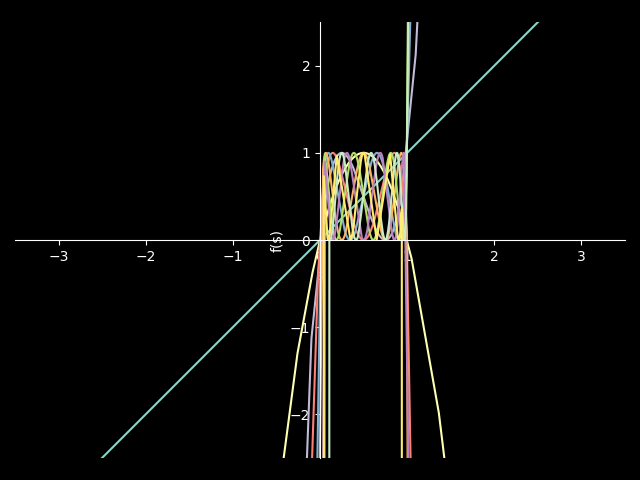

In [3]:
# these are libraries I have been working on
from geometor.render import *
from geometor.utils import *
from geometor.model import *
%matplotlib widget

limx, limy = (-3.5, 3.5), (-2.5, 2.5)
exprs = [p.expr for p in polys]

plots = spp.plot(*exprs, aspect_ratio=(1,1), show=False)
plots.xlim = limx
plots.ylim = limy

plots.save('spread_polynomials.png')
plots.show()